In [1]:
import torch
torch.cuda.empty_cache() 
from torchvision import transforms

import livia.embedding as embedding
import livia.triplet as triplet

import pandas as pd
import pickle
import os
import sys
import sklearn
import matplotlib.pyplot as plt
sys.path.append('./_7_image_embedding')

import _7_image_embedding.utility_functions  as uf
from sklearn.decomposition import PCA

if torch.cuda.is_available(): 
    device = "cuda" 
else: 
    device = "cpu"   

In [2]:
# root_dir -> where images are stored
root_dir = 'data_local/images/wm_cropped'

# log_dir + run_name
log_dir = "experiments/runs/"
run_name = 'grayscale_wm_pretrained_unfrozen_triplets=249996_size=224_bs=32_margin=1_epochs=10_lr=0.0001'

evaluation_dir = f"evaluation_results/{run_name}"

In [3]:
triplet_model = torch.load(log_dir + run_name + "/triplet_net.pt", map_location=device)

In [4]:
image_embedding = embedding.load_csv(evaluation_dir + "/image_embedding.csv")
hidden_states = image_embedding.embedding

### PCA 

In [5]:
n = 50
pca = PCA(n_components=n)
pca.fit(hidden_states)

PCA(n_components=50)

In [6]:
explained_var_ratio = pca.explained_variance_ratio_

In [7]:
# how much variance is explained by the n dimensions with the largest variance
sum(explained_var_ratio)

0.9999948892080777

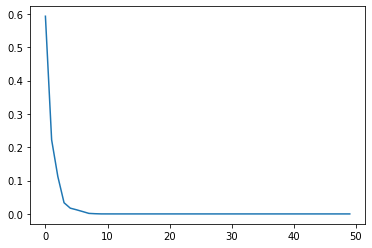

In [8]:
# plot expained variance ratio
plt.plot(explained_var_ratio)
plt.show()

In [9]:
sum(explained_var_ratio[:10])

0.9998951561827838

In [10]:
sum(explained_var_ratio[:3])

0.927394310418548

### Pairwise distances

In [27]:
import numpy as np
rng = np.random.default_rng()

In [28]:
# randomly sample n embedding vectors to not run out of memory
n = 10000
hidden_states_sample = rng.choice(hidden_states, n, replace=False)

In [31]:
p_distances = sklearn.metrics.pairwise_distances(hidden_states_sample, metric='cosine')
p_distances.shape

(10000, 10000)

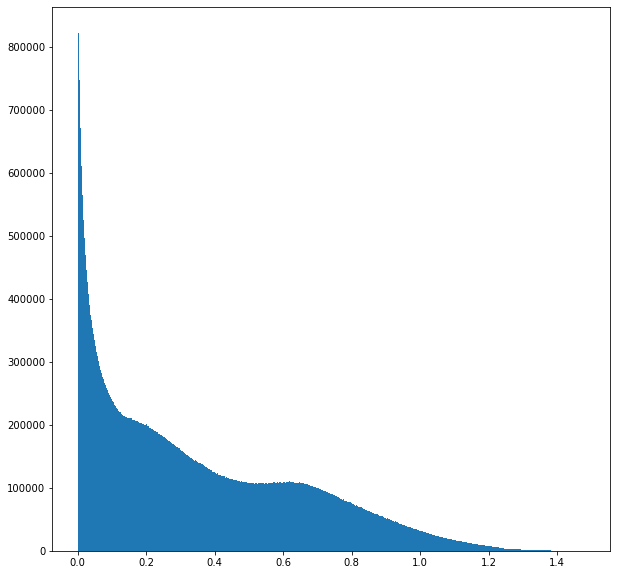

In [32]:
fig, ax = plt.subplots(figsize = (10,10))
ax.hist(p_distances.flatten(), bins=1000)
plt.show()
